In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/kaggle/input/credit-card/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

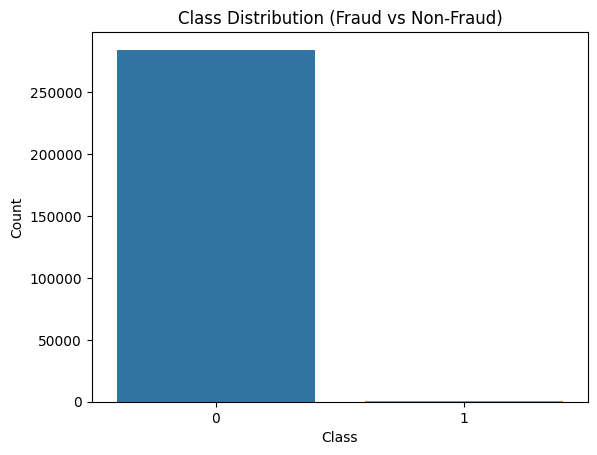

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (Fraud vs Non-Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
legit_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

legit_df.shape

(284315, 31)

In [ ]:
fraud_df.shape

(492, 31)

In [ ]:
legit_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
df.groupby('Class').mean().T

Class,0,1
Time,94838.202258,80746.806911
V1,0.008258,-4.771948
V2,-0.006271,3.623778
V3,0.012171,-7.033281
V4,-0.007860,4.542029
V5,0.005453,-3.151225
V6,0.002419,-1.397737
V7,0.009637,-5.568731
V8,-0.000987,0.570636
V9,0.004467,-2.581123


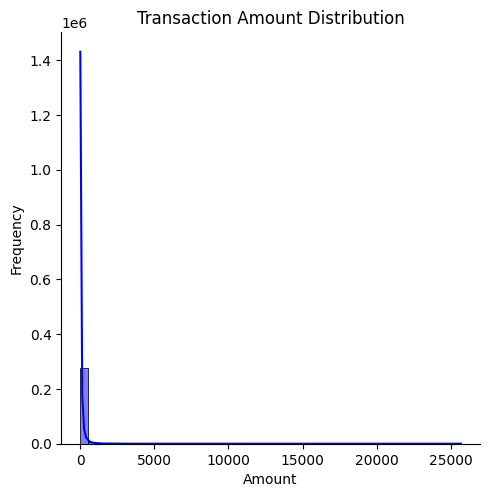

In [ ]:
# Distribution of 'Amount' feature
sns.displot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

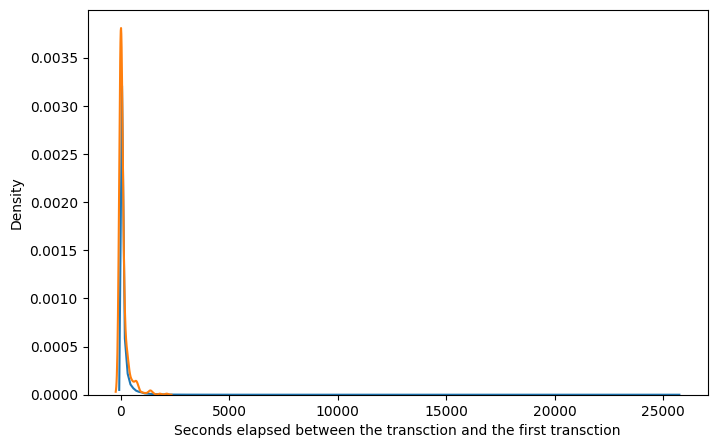

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.distplot(legit_df['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(fraud_df['Amount'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

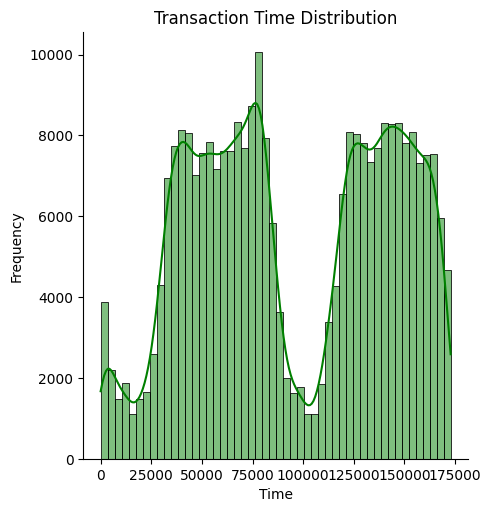

In [ ]:
# Distribution of 'Time' feature
sns.displot(df['Time'], bins=50, kde=True, color='green')
plt.title('Transaction Time Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

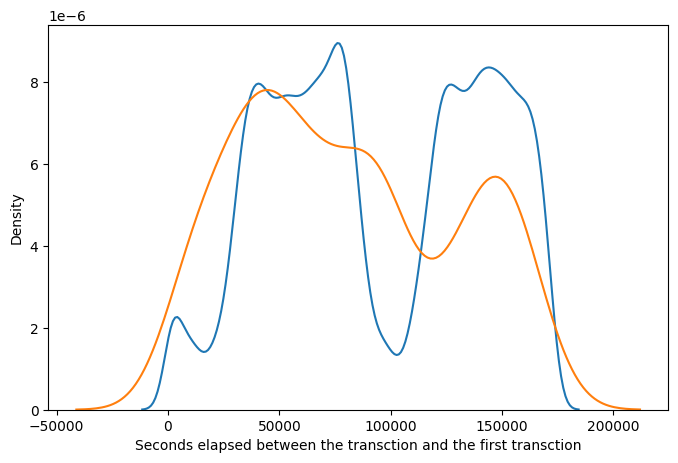

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.distplot(legit_df['Time'],label='fraudulent',hist=False)
ax = sns.distplot(fraud_df['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

In [ ]:
df.drop('Time', axis=1, inplace=True)

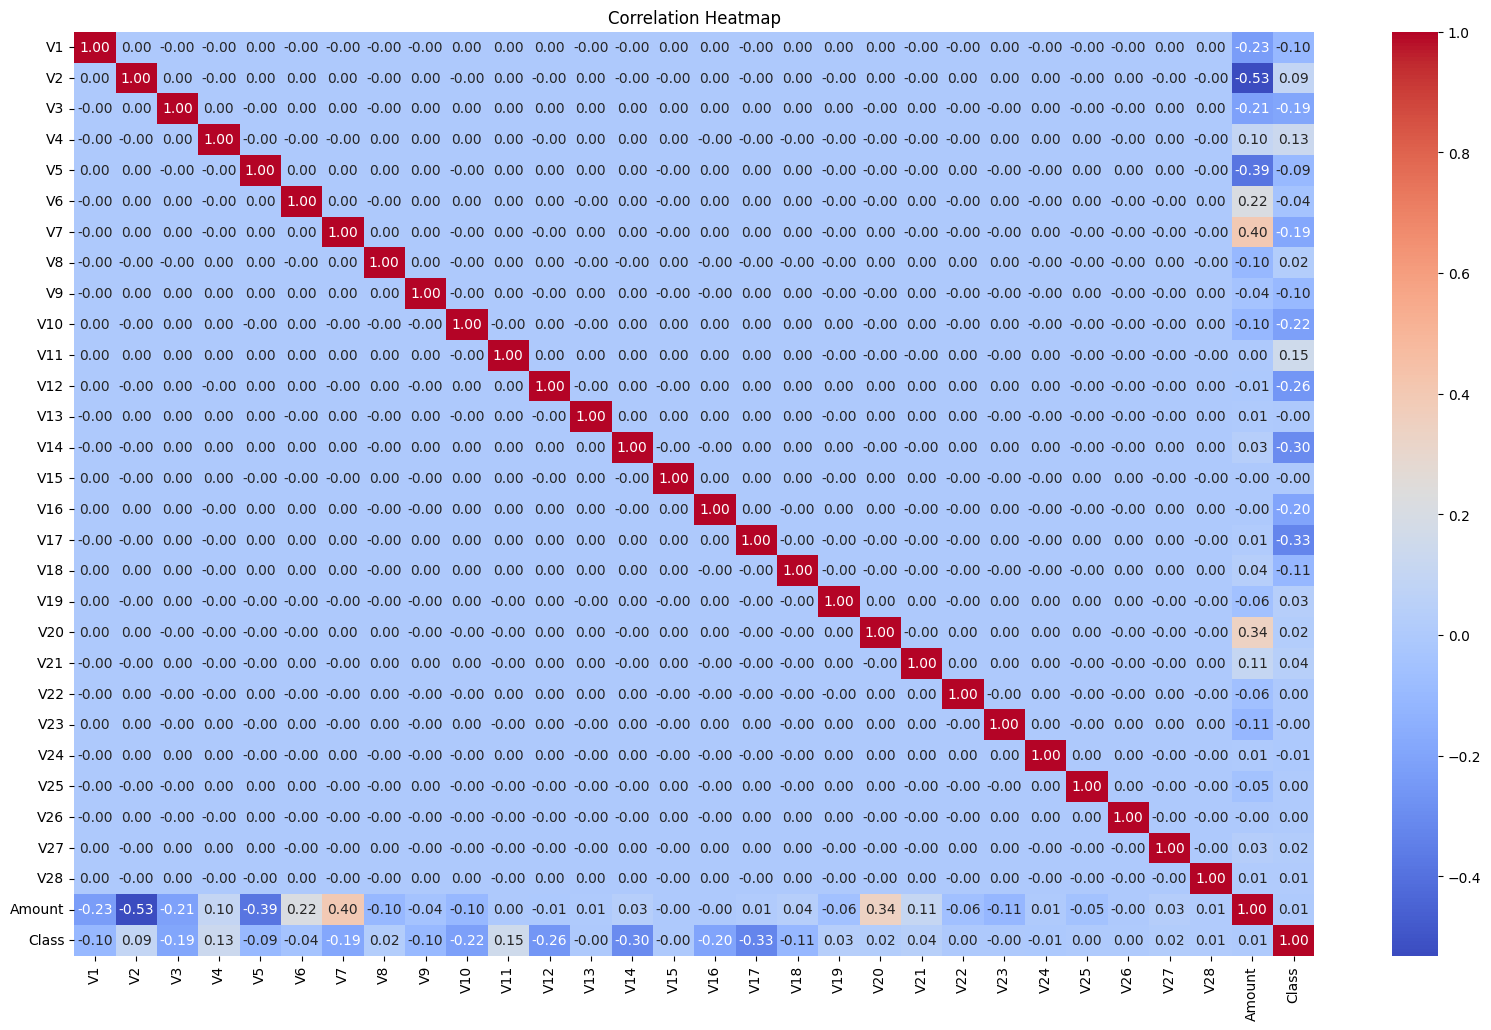

In [ ]:
plt.figure(figsize=(20, 12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

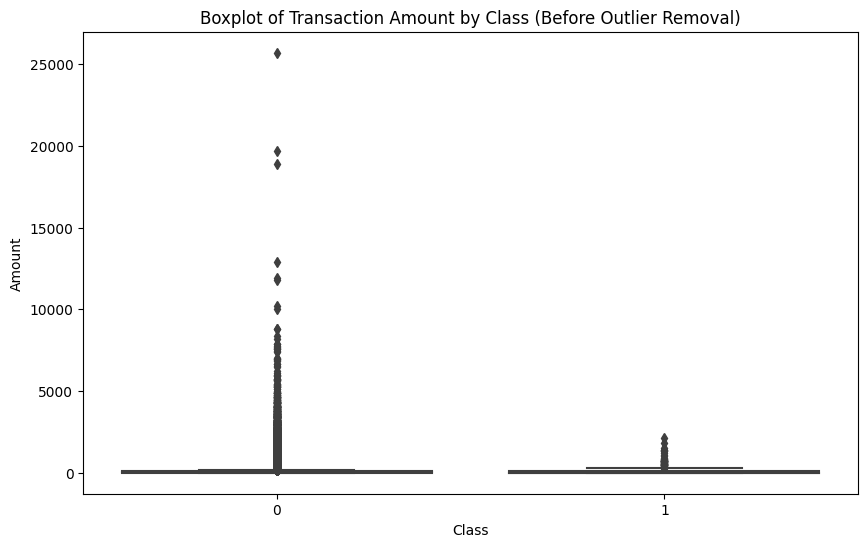

In [ ]:
# Visualize potential outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title('Boxplot of Transaction Amount by Class (Before Outlier Removal)')
plt.show()


In [ ]:
# Detecting Outliers using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1


outliers = ((df['Amount'] < (Q1['Amount'] - 1.5 * IQR['Amount'])) |
                   (df['Amount'] > (Q3['Amount'] + 1.5 * IQR['Amount'])))

outlier_df = df.copy()
outlier_df['Outlier'] = np.where(outliers, 'Outlier', 'Normal')

print(f'Number of Outliers Detected: {outliers.sum()}')

Number of Outliers Detected: 31904


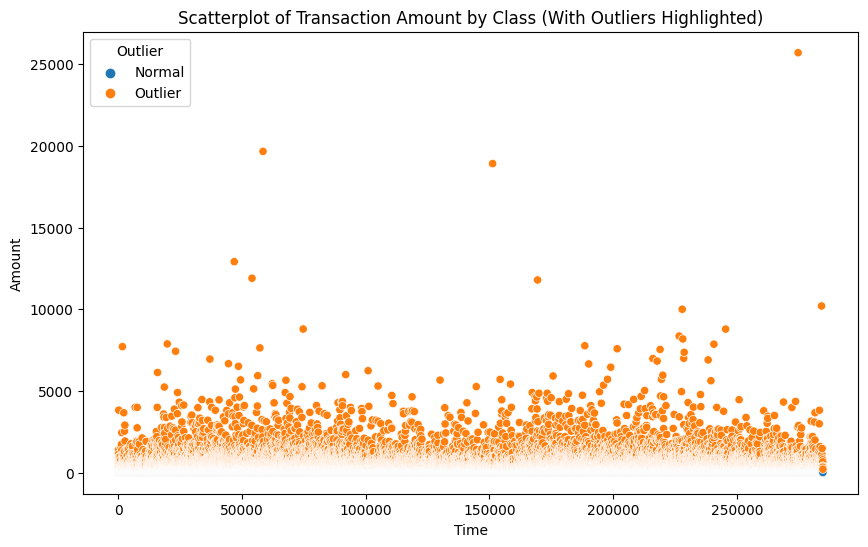

In [ ]:
# Scatterplot of 'Amount' by 'Class' with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=outlier_df.index, y='Amount', hue='Outlier', data=outlier_df)
plt.title('Scatterplot of Transaction Amount by Class (With Outliers Highlighted)')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [ ]:
# Check how many outliers are being detected
print(f"Number of outliers detected: {outliers.sum()}")
print(f"Number of normal points: {len(outliers) - outliers.sum()}")

# Print a few rows to verify the 'Outlier' column
outlier_df[['Amount', 'Outlier']].head()

Number of outliers detected: 31904
Number of normal points: 252903


,Amount,Outlier
0,149.62,Normal
1,2.69,Normal
2,378.66,Outlier
3,123.50,Normal
4,69.99,Normal


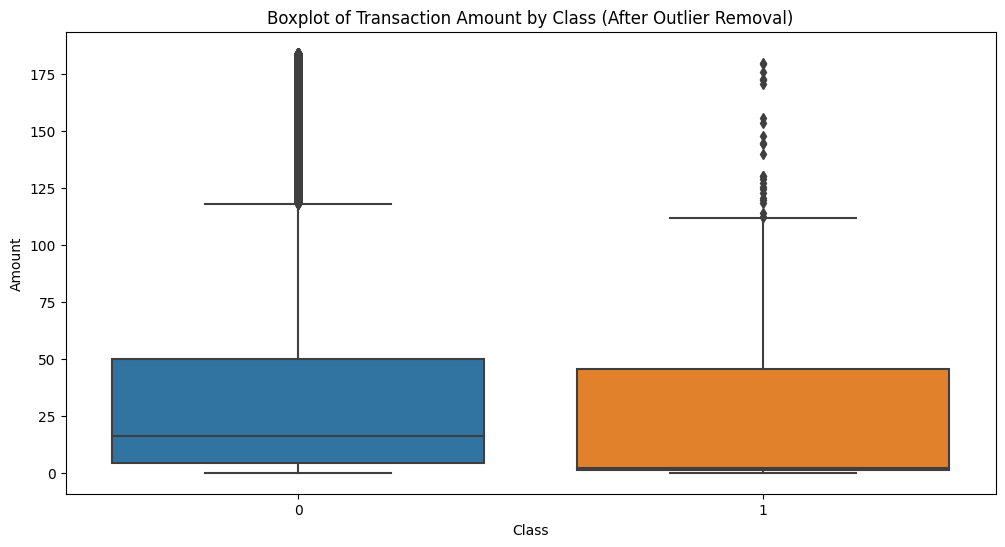

In [ ]:
cleaned_df = df[~outliers]

# Boxplot after removing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='Class', y='Amount')
plt.title('Boxplot of Transaction Amount by Class (After Outlier Removal)')
plt.show()

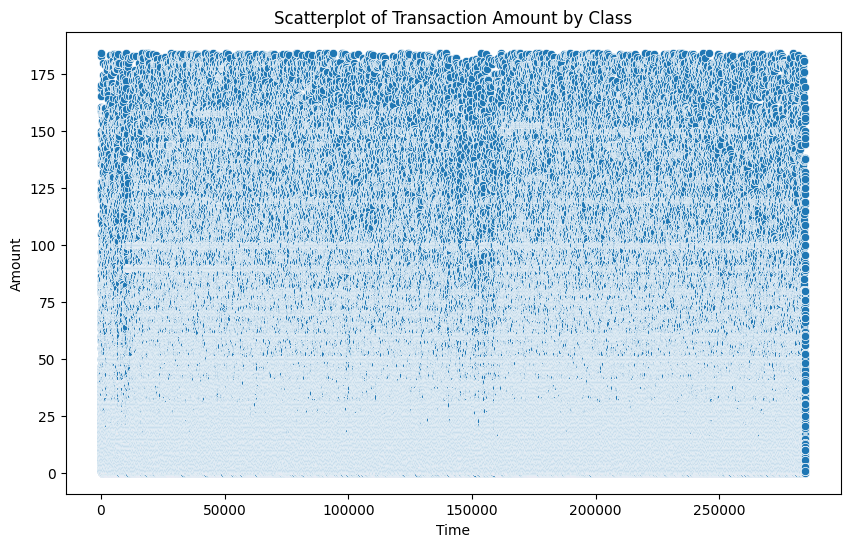

In [ ]:
# Scatterplot of 'Amount' by 'Class' with outliers highlighted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=cleaned_df.index, y='Amount', data=cleaned_df)
plt.title('Scatterplot of Transaction Amount by Class')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cleaned_df['Amount'] = scaler.fit_transform(cleaned_df[['Amount']])
cleaned_df['Amount'].head()

0    2.718502
1   -0.765550
3    2.099136
4    0.830290
5   -0.742312
Name: Amount, dtype: float64

In [ ]:
X = cleaned_df.drop('Class', axis=1)
y = cleaned_df['Class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


print("\nClass Distribution After Resampling:")
print(pd.Series(y_resampled).value_counts())


Class Distribution After Resampling:
Class
0    202012
1    202012
Name: count, dtype: int64


In [ ]:
from collections import Counter

print("Original Class Distribution:", Counter(y_train))
print("Resampled Class Distribution:", Counter(y_resampled))

Original Class Distribution: Counter({0: 202012, 1: 310})
Resampled Class Distribution: Counter({0: 202012, 1: 202012})


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
import joblib

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    print(f"\n{model_name}:")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Confusion Matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC-AUC
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"\nROC-AUC Score: {roc_auc:.4f}")

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    pr_auc = auc(recall, precision)
    print(f"Precision-Recall AUC: {pr_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

    # Plot Precision-Recall Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.4f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()

    # Save the model
    model_path = f'{model_name.lower().replace(" ", "_")}_model.pkl'
    joblib.dump(model, model_path)
    print(f"Model saved at: {model_path}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


Logistic Regression:

Confusion Matrix:
[[49566   924]
 [    7    84]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     50490
           1       0.08      0.92      0.15        91

    accuracy                           0.98     50581
   macro avg       0.54      0.95      0.57     50581
weighted avg       1.00      0.98      0.99     50581


ROC-AUC Score: 0.9911
Precision-Recall AUC: 0.7434


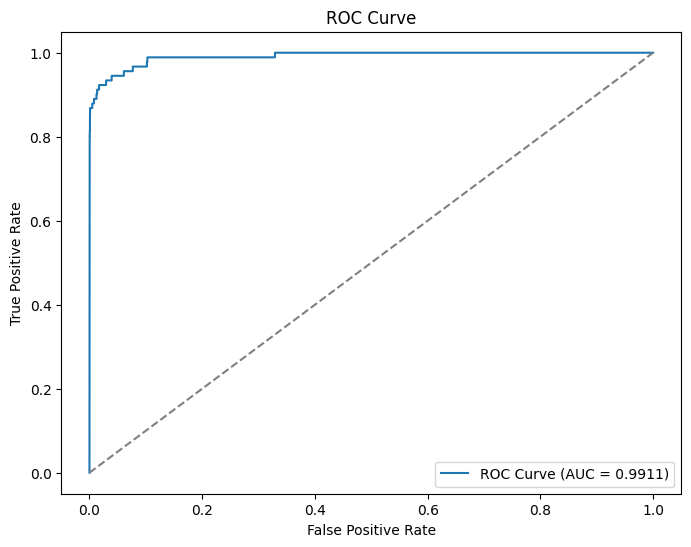

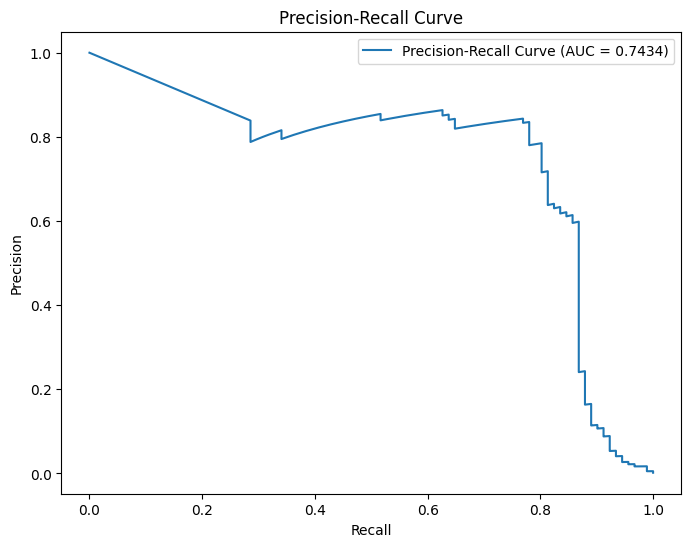

Model saved at: logistic_regression_model.pkl


In [ ]:
# Logistic Regression
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
evaluate_model(logistic_model, X_resampled, y_resampled, X_test, y_test, "Logistic Regression")


Decision Tree:

Confusion Matrix:
[[50413    77]
 [   23    68]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.47      0.75      0.58        91

    accuracy                           1.00     50581
   macro avg       0.73      0.87      0.79     50581
weighted avg       1.00      1.00      1.00     50581


ROC-AUC Score: 0.8729
Precision-Recall AUC: 0.6083


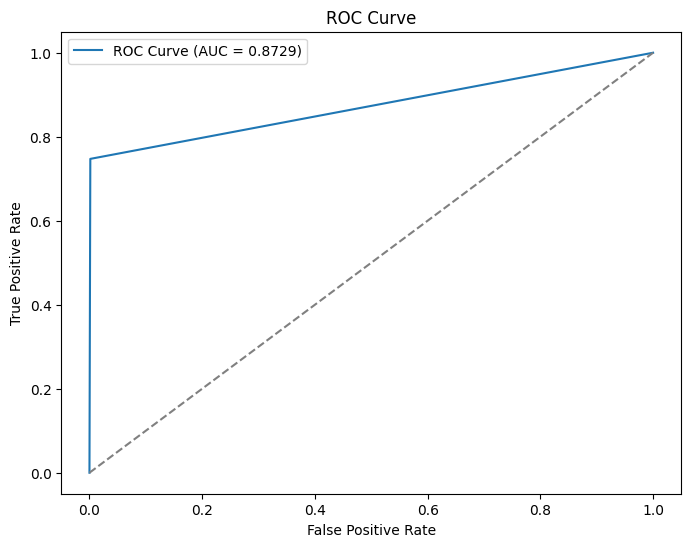

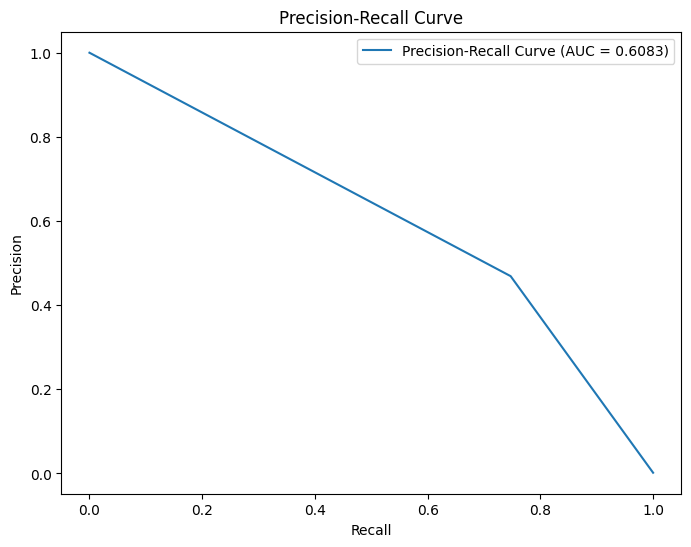

Model saved at: decision_tree_model.pkl


In [ ]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_resampled, y_resampled, X_test, y_test, "Decision Tree")


Random Forest:

Confusion Matrix:
[[50481     9]
 [   14    77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.90      0.85      0.87        91

    accuracy                           1.00     50581
   macro avg       0.95      0.92      0.93     50581
weighted avg       1.00      1.00      1.00     50581


ROC-AUC Score: 0.9668
Precision-Recall AUC: 0.8523


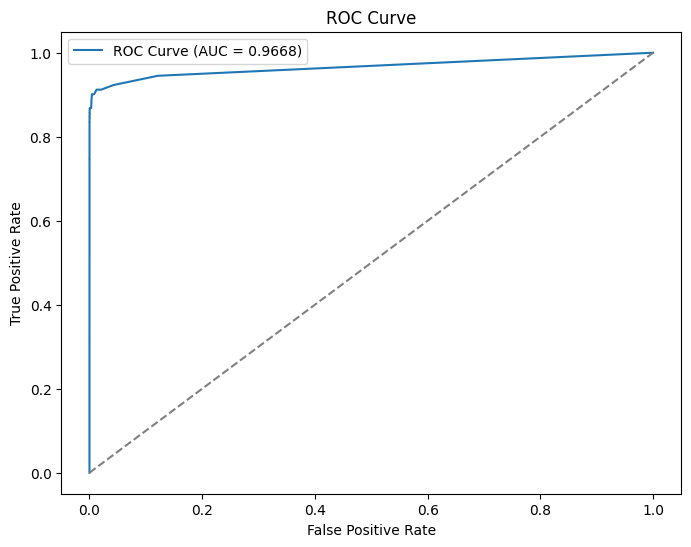

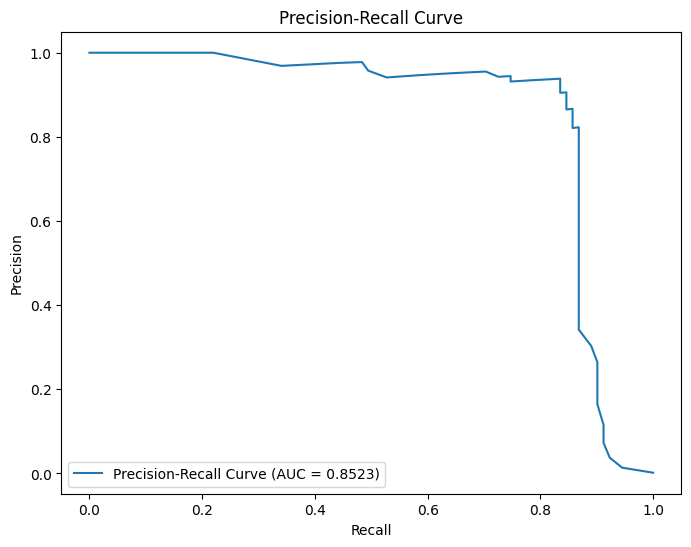

Model saved at: random_forest_model.pkl


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_resampled, y_resampled, X_test, y_test, "Random Forest")


XGBoost:

Confusion Matrix:
[[50474    16]
 [   13    78]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.83      0.86      0.84        91

    accuracy                           1.00     50581
   macro avg       0.91      0.93      0.92     50581
weighted avg       1.00      1.00      1.00     50581


ROC-AUC Score: 0.9756
Precision-Recall AUC: 0.8629


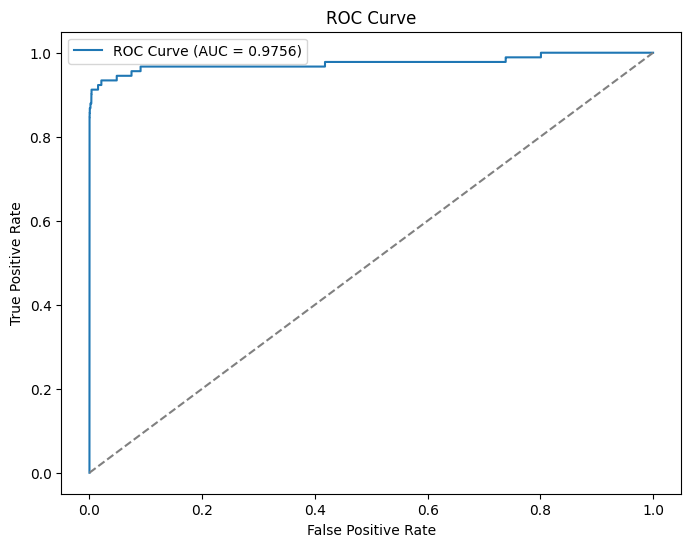

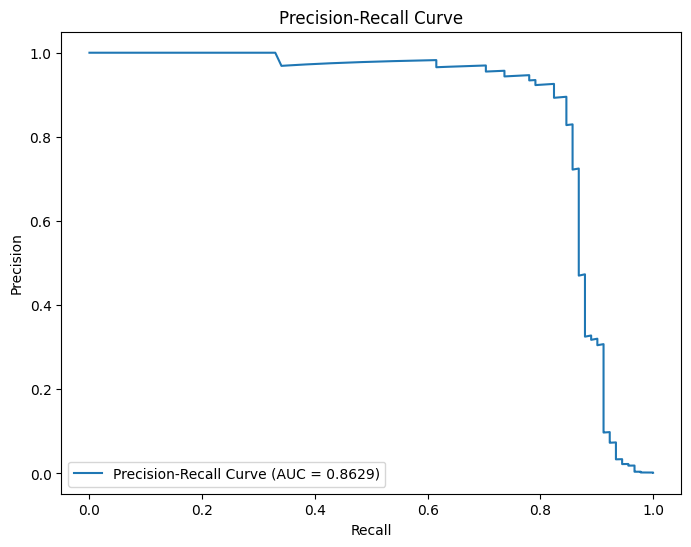

Model saved at: xgboost_model.pkl


In [ ]:
# XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
evaluate_model(xgb_model, X_resampled, y_resampled, X_test, y_test, "XGBoost")


Support Vector Machine:

Confusion Matrix:
[[49940   550]
 [    8    83]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     50490
           1       0.13      0.91      0.23        91

    accuracy                           0.99     50581
   macro avg       0.57      0.95      0.61     50581
weighted avg       1.00      0.99      0.99     50581


ROC-AUC Score: 0.9827
Precision-Recall AUC: 0.5605


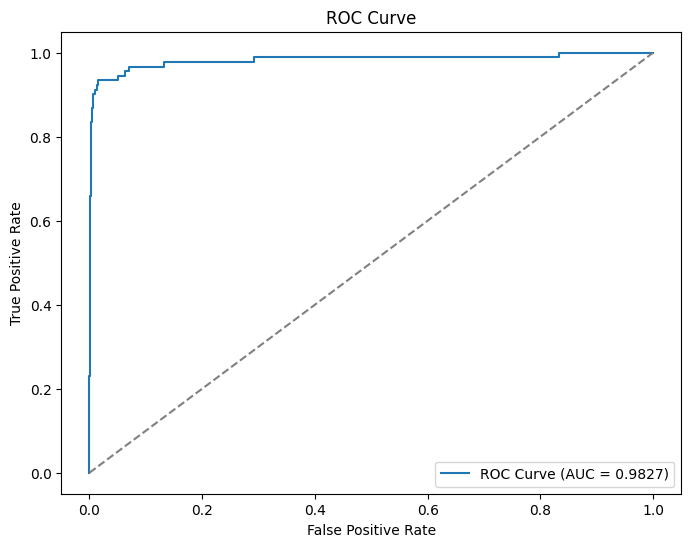

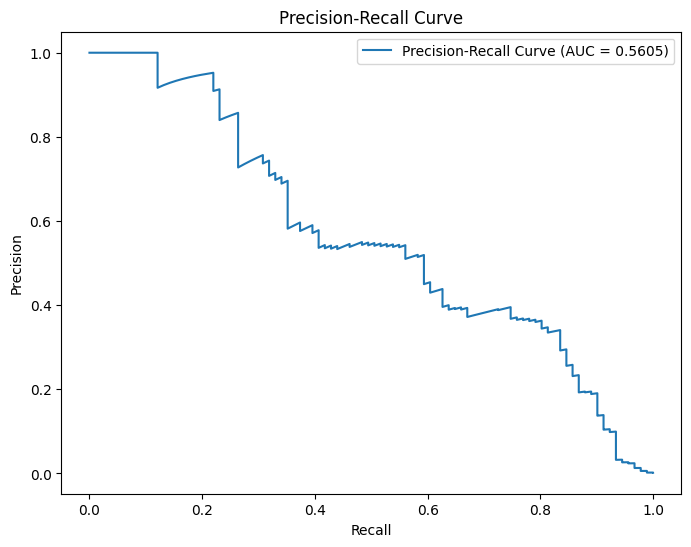

Model saved at: support_vector_machine_model.pkl


In [ ]:
# Support Vector Machine
svm_model = SVC(probability=True, random_state=42)
evaluate_model(svm_model, X_resampled, y_resampled, X_test, y_test, "Support Vector Machine")


LightGBM:
[LightGBM] [Info] Number of positive: 202012, number of negative: 202012
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066005 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 404024, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Confusion Matrix:
[[50454    36]
 [   14    77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.68      0.85      0.75        91

    accuracy                           1.00     50581
   macro avg       0.84      0.92      0.88     50581
weighted avg       1.00      1.00      1.00     50581


ROC-AUC Score: 0.9600
Precision-Recall AUC: 0.8446


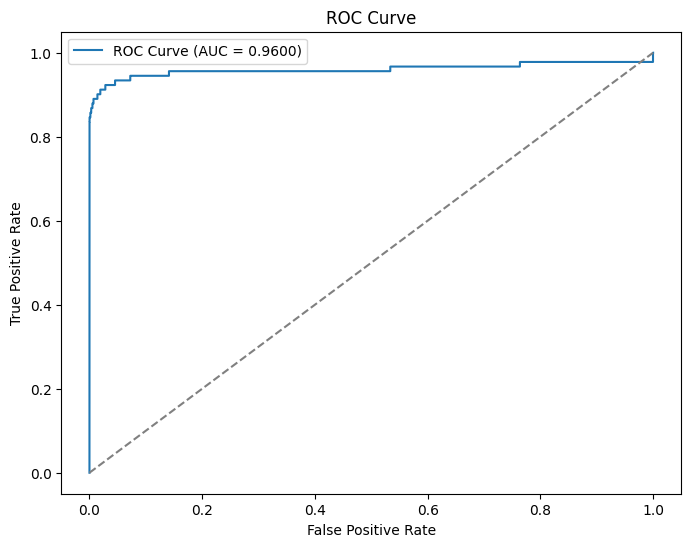

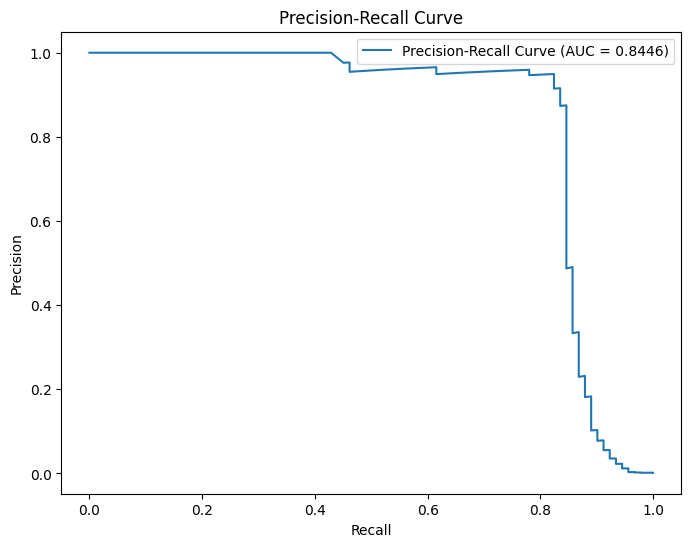

Model saved at: lightgbm_model.pkl


In [ ]:
# LightGBM
lgbm_model = LGBMClassifier(random_state=42)
evaluate_model(lgbm_model, X_resampled, y_resampled, X_test, y_test, "LightGBM")


CatBoost:

Confusion Matrix:
[[50430    60]
 [   12    79]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     50490
           1       0.57      0.87      0.69        91

    accuracy                           1.00     50581
   macro avg       0.78      0.93      0.84     50581
weighted avg       1.00      1.00      1.00     50581


ROC-AUC Score: 0.9858
Precision-Recall AUC: 0.8492


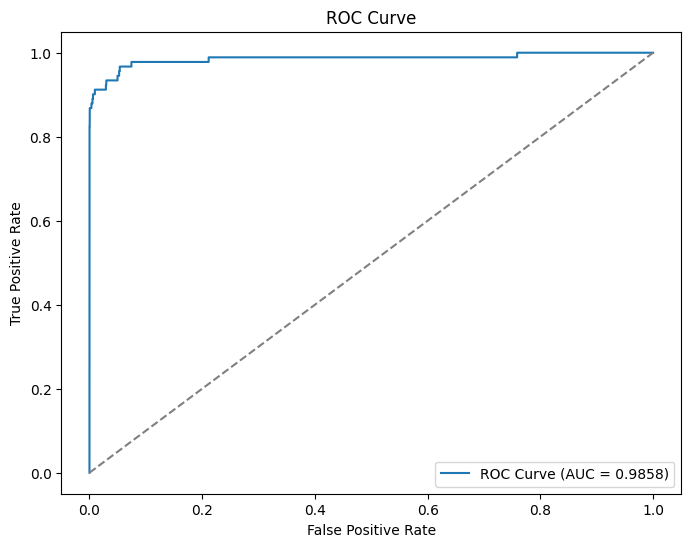

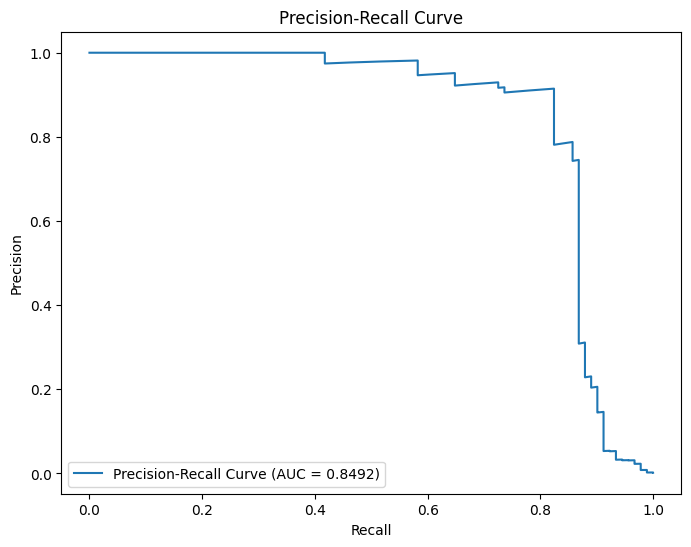

Model saved at: catboost_model.pkl


In [ ]:
# CatBoost
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
evaluate_model(catboost_model, X_resampled, y_resampled, X_test, y_test, "CatBoost")

In [ ]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost', 'SVM', 'LightGBM', 'CatBoost']
roc_auc_scores = [
    roc_auc_score(y_test, logistic_model.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, lgbm_model.predict_proba(X_test)[:, 1]),
    roc_auc_score(y_test, catboost_model.predict_proba(X_test)[:, 1])
]

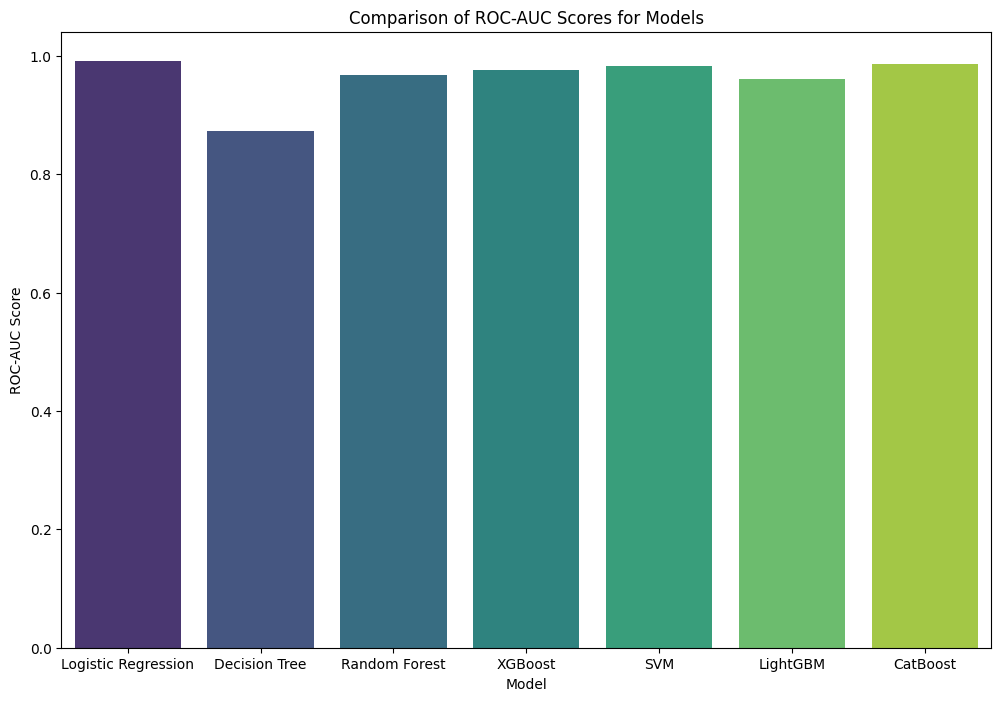

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=models, y=roc_auc_scores, palette='viridis')
plt.title('Comparison of ROC-AUC Scores for Models')
plt.ylabel('ROC-AUC Score')
plt.xlabel('Model')
plt.show()